In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving LST_Monthly.csv to LST_Monthly (2).csv


In [ ]:
df=pd.read_csv('LST_Monthly (2).csv')

In [ ]:
df.head()

,DATE,LST,Forecast
0,2010/1/1,22.284,NaN
1,2010/2/1,24.209,NaN
2,2010/3/1,35.284,NaN
3,2010/4/1,38.597,NaN
4,2010/5/1,39.401,NaN


In [ ]:
df.tail()

,DATE,LST,Forecast
115,2019/8/1,27.102,NaN
116,2019/9/1,26.001,NaN
117,2019/10/1,26.411,NaN
118,2019/11/1,24.201,NaN
119,2019/12/1,18.716,NaN


In [ ]:
## Cleaning up the data
df.columns=["DATE","LST","Forecast"]
df.head()

,DATE,LST,Forecast
0,2010/1/1,22.284,NaN
1,2010/2/1,24.209,NaN
2,2010/3/1,35.284,NaN
3,2010/4/1,38.597,NaN
4,2010/5/1,39.401,NaN


In [ ]:
df.tail()

,DATE,LST,Forecast
115,2019/8/1,27.102,NaN
116,2019/9/1,26.001,NaN
117,2019/10/1,26.411,NaN
118,2019/11/1,24.201,NaN
119,2019/12/1,18.716,NaN


In [ ]:
# Convert Month into Datetime
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,LST,Forecast
0,2010-01-01,22.284,NaN
1,2010-02-01,24.209,NaN
2,2010-03-01,35.284,NaN
3,2010-04-01,38.597,NaN
4,2010-05-01,39.401,NaN


In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head()

,LST,Forecast
DATE,,
2010-01-01,22.284,NaN
2010-02-01,24.209,NaN
2010-03-01,35.284,NaN
2010-04-01,38.597,NaN
2010-05-01,39.401,NaN


In [ ]:
df.describe()

,LST,Forecast
count,120.000000,0.0
mean,28.649358,NaN
std,5.351771,NaN
min,16.770000,NaN
25%,24.366750,NaN
50%,27.949000,NaN
75%,32.842250,NaN
max,39.541000,NaN


## Step 2: Visualize the Data

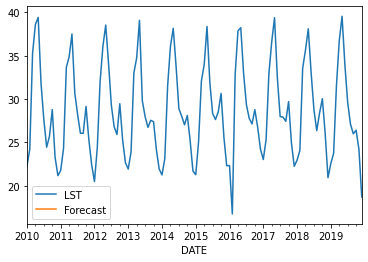

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['LST'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(LST):
    result=adfuller(LST)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['LST'])

ADF Test Statistic : -2.1317407509505153
p-value : 0.23194446104639732
#Lags Used : 11
Number of Observations Used : 108
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['LST First Difference'] = df['LST'] - df['LST'].shift(1)

In [ ]:
df['LST'].shift(1)

DATE
2010-01-01       NaN
2010-02-01    22.284
2010-03-01    24.209
2010-04-01    35.284
2010-05-01    38.597
               ...  
2019-08-01    29.600
2019-09-01    27.102
2019-10-01    26.001
2019-11-01    26.411
2019-12-01    24.201
Name: LST, Length: 120, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['LST']-df['LST'].shift(12)

In [ ]:
df.head(14)

,LST,Forecast,LST First Difference,Seasonal First Difference
DATE,,,,
2010-01-01,22.284,NaN,NaN,NaN
2010-02-01,24.209,NaN,1.925,NaN
2010-03-01,35.284,NaN,11.075,NaN
2010-04-01,38.597,NaN,3.313,NaN
2010-05-01,39.401,NaN,0.804,NaN
2010-06-01,31.816,NaN,-7.585,NaN
2010-07-01,27.645,NaN,-4.171,NaN
2010-08-01,24.454,NaN,-3.191,NaN
2010-09-01,25.706,NaN,1.252,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.9301261892949317
p-value : 0.0419552197376596
#Lags Used : 12
Number of Observations Used : 95
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


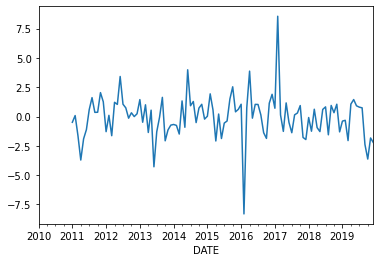

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

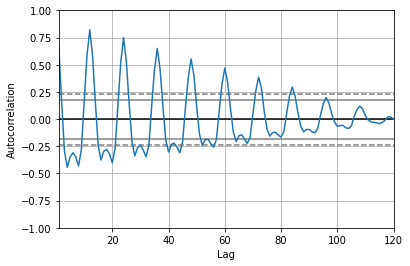

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['LST'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


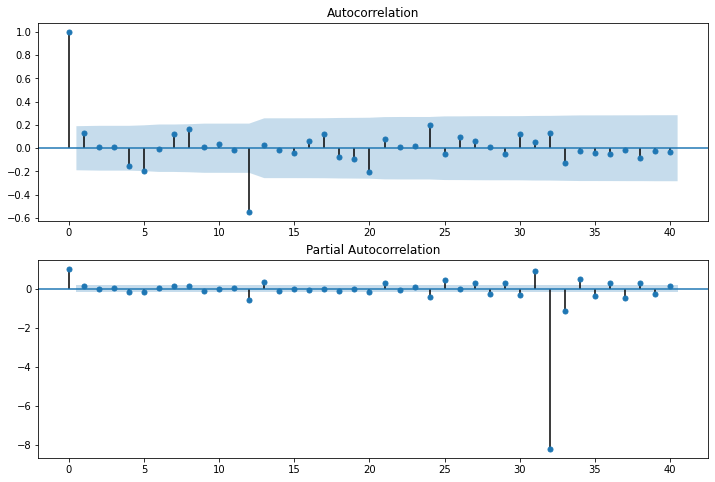

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['LST'],order=(2,1,2))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.LST   No. Observations:                  119
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -302.509
Method:                       css-mle   S.D. of innovations              2.970
Date:                Sat, 03 Dec 2022   AIC                            617.018
Time:                        10:26:32   BIC                            633.693
Sample:                    02-01-2010   HQIC                           623.789
                         - 12-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0607      0.318     -0.191      0.849      -0.685       0.563
ar.L1.D.LST     0.9931      0.017     57.536      0.000       0.959       1.027
ar.L2.D.LST    -0.9839      0.013    -72.909      0.000      -1.010      -0.957
ma.L1.D.LST    -0.8416      0.040    -21.047      0.000      -0.920      -0.763
ma.L2.D.LST     0.9998      0.061     16.402      0.000       0.880       1.119
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5047           -0.8727j            1.0082           -0.1666
AR.2            0.5047           +0.8727j            1.0082            0.1666
MA.1            0.4209           -0.9072j            1.0001           -0.1809
MA.2            0.4209           +0.9072j            1.0001            0.1809
-----------------------------------------------------------------------------
"""

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['LST'],order=(2, 1, 2),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


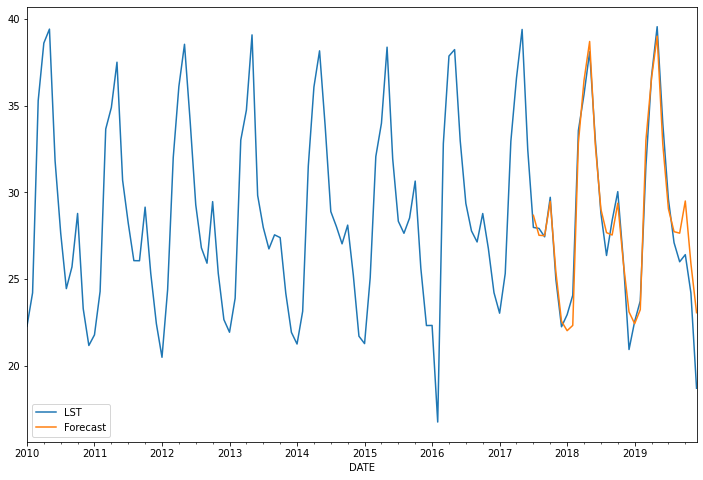

In [ ]:
df['Forecast']=results.predict(start=90,end=179,dynamic=True)
df[['LST','Forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,LST,Forecast,LST First Difference,Seasonal First Difference
2023-07-01,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

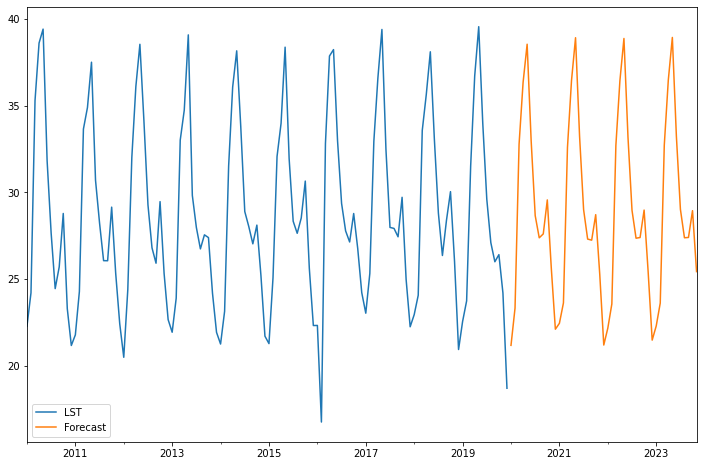

In [ ]:
future_df['Forecast'] = results.predict(start = 120, end = 200, dynamic= True)  
future_df[['LST', 'Forecast']].plot(figsize=(12,8)) 